In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import seaborn as sns
import geopandas as gpd
from scipy.stats import pearsonr
from scipy import stats

pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

In [23]:
home_diversity = pd.read_pickle("../output/CA_CBG_dominantRace.pkl") #CBG level diversity
print(home_diversity.shape[0])
home_diversity = home_diversity[home_diversity['scaled_entropy'].notna()]
print(home_diversity.shape[0])
df_poi_CBG = pd.read_pickle('../output/LA_POI_belong_CBG.pkl') # each POI belongs to which CBG
df_poi_CBG_merged = pd.merge(df_poi_CBG,home_diversity,on='block_group_id')
df_poi_CBG_mergedneed = df_poi_CBG_merged[['place_id','scaled_entropy','class_dominant']]
df_poi_CBG_mergedneed.rename(columns={'scaled_entropy': 'home_scaled_entropy','class_dominant':'home_class_dominant'}, inplace=True)
df_poi_CBG_mergedneed # each POI's home based diversity

23212
23141


,place_id,home_scaled_entropy,home_class_dominant
0,25609839,0.096533,R_HispanicLatinx_low diversity
1,31157976,0.096533,R_HispanicLatinx_low diversity
2,27287495,0.096533,R_HispanicLatinx_low diversity
3,25590381,0.472712,R_HispanicLatinx_moderate diversity
4,25105312,0.472712,R_HispanicLatinx_moderate diversity
...,...,...,...
61963,31930253,0.312969,R_HispanicLatinx_low diversity
61964,25292594,0.289936,R_HispanicLatinx_low diversity
61965,25499120,0.562175,R_HispanicLatinx_moderate diversity
61966,25538751,0.762543,high diversity


# 1. Greater LA
Only use the normalized entropy. Do not consider the one weighted by activity duration. 

In [31]:
weekday = False #False True
if weekday:
    diversity_morning_GLA = pd.read_pickle("../output/onlyGreaterLAresidents/LA_POI_diversity_201903_weekday_morning.pkl")  
    diversity_noon_GLA = pd.read_pickle("../output/onlyGreaterLAresidents/LA_POI_diversity_201903_weekday_noon.pkl")
    diversity_afternoon_GLA = pd.read_pickle("../output/onlyGreaterLAresidents/LA_POI_diversity_201903_weekday_afternoon.pkl")
    diversity_evening_GLA = pd.read_pickle("../output/onlyGreaterLAresidents/LA_POI_diversity_201903_weekday_evening.pkl")
    print(diversity_morning_GLA.shape[0],diversity_noon_GLA.shape[0],diversity_afternoon_GLA.shape[0],diversity_evening_GLA.shape[0])
    title = 'Weekday'
else: #weekend
    diversity_morning_GLA = pd.read_pickle("../output/onlyGreaterLAresidents/LA_POI_diversity_201903_weekend_morning.pkl")  
    diversity_noon_GLA = pd.read_pickle("../output/onlyGreaterLAresidents/LA_POI_diversity_201903_weekend_noon.pkl")
    diversity_afternoon_GLA = pd.read_pickle("../output/onlyGreaterLAresidents/LA_POI_diversity_201903_weekend_afternoon.pkl")
    diversity_evening_GLA = pd.read_pickle("../output/onlyGreaterLAresidents/LA_POI_diversity_201903_weekend_evening.pkl")
    print(diversity_morning_GLA.shape[0],diversity_noon_GLA.shape[0],diversity_afternoon_GLA.shape[0],diversity_evening_GLA.shape[0])
    title = 'Weekend'

23888 28287 28330 22178


In [32]:
for item in [diversity_morning_GLA,diversity_noon_GLA,diversity_afternoon_GLA,diversity_evening_GLA]:
    print('***************')
    print('count:',item.shape[0])
    print('mean:',round(item.scaled_entropy.mean(),3))
    print('std:',round(item.scaled_entropy.std(),3))    

***************
count: 23888
mean: 0.603
std: 0.165
***************
count: 28287
mean: 0.626
std: 0.152
***************
count: 28330
mean: 0.629
std: 0.149
***************
count: 22178
mean: 0.614
std: 0.159


# 2. Whole CA

In [33]:
weekday = False#False True
if weekday:
    diversity_morning = pd.read_pickle("../output/LA_POI_diversity_201903_weekday_morning.pkl")  
    diversity_noon = pd.read_pickle("../output/LA_POI_diversity_201903_weekday_noon.pkl")
    diversity_afternoon = pd.read_pickle("../output/LA_POI_diversity_201903_weekday_afternoon.pkl")
    diversity_evening = pd.read_pickle("../output/LA_POI_diversity_201903_weekday_evening.pkl")
    print(diversity_morning.shape[0],diversity_noon.shape[0],diversity_afternoon.shape[0],diversity_evening.shape[0])
else: #weekend
    diversity_morning = pd.read_pickle("../output/LA_POI_diversity_201903_weekend_morning.pkl")  
    diversity_noon = pd.read_pickle("../output/LA_POI_diversity_201903_weekend_noon.pkl")
    diversity_afternoon = pd.read_pickle("../output/LA_POI_diversity_201903_weekend_afternoon.pkl")
    diversity_evening = pd.read_pickle("../output/LA_POI_diversity_201903_weekend_evening.pkl")
    print(diversity_morning.shape[0],diversity_noon.shape[0],diversity_afternoon.shape[0],diversity_evening.shape[0])

24051 28393 28416 22288


In [34]:
for item in [diversity_morning,diversity_noon,diversity_afternoon,diversity_evening]:
    print('***************')
    print('count:',item.shape[0])
    print('mean:',round(item.scaled_entropy.mean(),3))
    print('std:',round(item.scaled_entropy.std(),3))

***************
count: 24051
mean: 0.606
std: 0.164
***************
count: 28393
mean: 0.628
std: 0.151
***************
count: 28416
mean: 0.631
std: 0.148
***************
count: 22288
mean: 0.616
std: 0.158


# Mann-Whitney U statistic
Sample size of two groups varies

In [35]:
from scipy.stats import mannwhitneyu

# diversity_morning.scaled_entropy, diversity_morning_GLA.scaled_entropy
# diversity_noon.scaled_entropy, diversity_noon_GLA.scaled_entropy
# diversity_afternoon.scaled_entropy, diversity_afternoon_GLA.scaled_entropy
# diversity_evening.scaled_entropy, diversity_evening_GLA.scaled_entropy

CAlist = [diversity_morning.scaled_entropy,diversity_noon.scaled_entropy,diversity_afternoon.scaled_entropy,diversity_evening.scaled_entropy]
GLAlist = [diversity_morning_GLA.scaled_entropy,diversity_noon_GLA.scaled_entropy,diversity_afternoon_GLA.scaled_entropy,diversity_evening_GLA.scaled_entropy]

for i in range(0,len(CAlist)):
    statistic, p_value = mannwhitneyu(CAlist[i], GLAlist[i])
    # Print the test statistic and p-value
    print("Mann-Whitney U statistic:", statistic)
    print("p-value:", round(p_value,3))

Mann-Whitney U statistic: 289894941.0
p-value: 0.083
Mann-Whitney U statistic: 405454274.0
p-value: 0.046
Mann-Whitney U statistic: 406234881.5
p-value: 0.056
Mann-Whitney U statistic: 249622395.0
p-value: 0.068


# The Wilcoxon signed-rank test test (no need to run below)
Groups come from the same population. Paired test.

44384 44287 44287
0.6327605820650889 0.6311564291880429
WilcoxonResult(statistic=9468954.0, pvalue=6.811028491203887e-254)


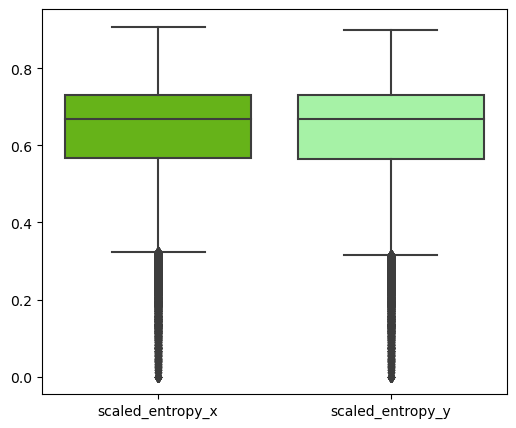

In [65]:
df_merge1 = pd.merge(diversity_morning[['place_id','scaled_entropy']],diversity_morning_GLA[['place_id','scaled_entropy']],on='place_id')
print(diversity_morning.shape[0], diversity_morning_GLA.shape[0], df_merge1.shape[0])
print(df_merge1.scaled_entropy_x.mean(),df_merge1.scaled_entropy_y.mean())
print(stats.wilcoxon(df_merge1.scaled_entropy_x, df_merge1.scaled_entropy_y))
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.boxplot(data=df_merge1[['scaled_entropy_x','scaled_entropy_y']])
plt.show()

46503 46425 46425
0.6492164630952061 0.6472287904738719
WilcoxonResult(statistic=19985540.0, pvalue=0.0)


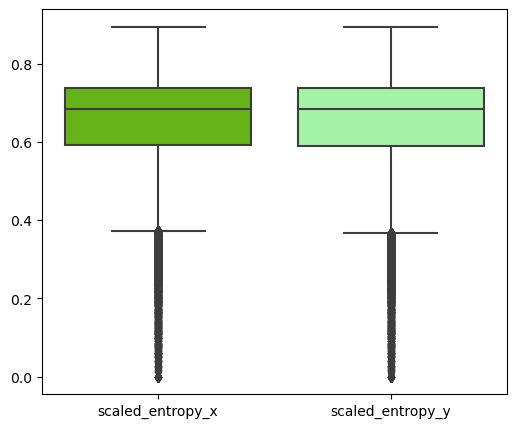

In [66]:
df_merge1 = pd.merge(diversity_noon[['place_id','scaled_entropy']],diversity_noon_GLA[['place_id','scaled_entropy']],on='place_id')
print(diversity_noon.shape[0], diversity_noon_GLA.shape[0], df_merge1.shape[0])
print(df_merge1.scaled_entropy_x.mean(),df_merge1.scaled_entropy_y.mean())
print(stats.wilcoxon(df_merge1.scaled_entropy_x, df_merge1.scaled_entropy_y))
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.boxplot(data=df_merge1[['scaled_entropy_x','scaled_entropy_y']])
plt.show()

46914 46844 46844
0.6457550470246142 0.6437508868843679
WilcoxonResult(statistic=23521575.0, pvalue=0.0)


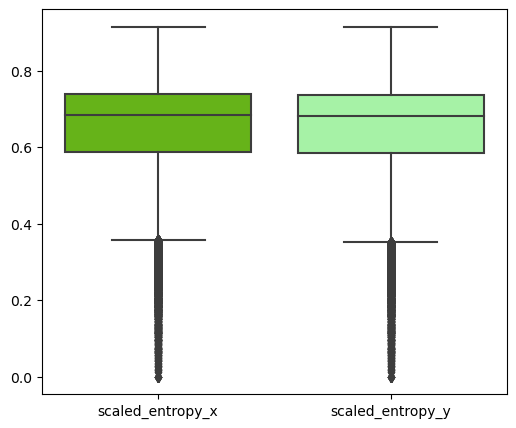

In [67]:
df_merge1 = pd.merge(diversity_afternoon[['place_id','scaled_entropy']],diversity_afternoon_GLA[['place_id','scaled_entropy']],on='place_id')
print(diversity_afternoon.shape[0], diversity_afternoon_GLA.shape[0], df_merge1.shape[0])
print(df_merge1.scaled_entropy_x.mean(),df_merge1.scaled_entropy_y.mean())
print(stats.wilcoxon(df_merge1.scaled_entropy_x, df_merge1.scaled_entropy_y))
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.boxplot(data=df_merge1[['scaled_entropy_x','scaled_entropy_y']])
plt.show()

41644 41512 41512
0.6310616360614425 0.6290542256507899
WilcoxonResult(statistic=13675382.0, pvalue=0.0)


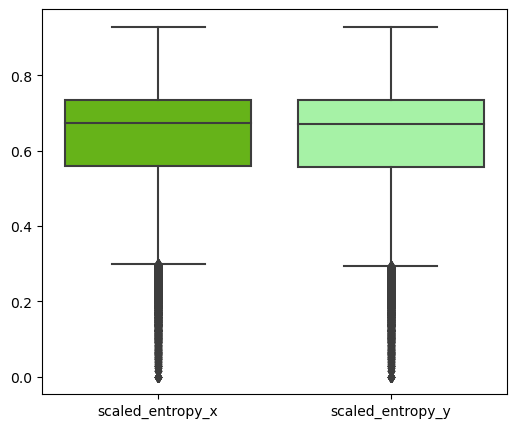

In [68]:
df_merge1 = pd.merge(diversity_evening[['place_id','scaled_entropy']],diversity_evening_GLA[['place_id','scaled_entropy']],on='place_id')
print(diversity_evening.shape[0], diversity_evening_GLA.shape[0], df_merge1.shape[0])
print(df_merge1.scaled_entropy_x.mean(),df_merge1.scaled_entropy_y.mean())
print(stats.wilcoxon(df_merge1.scaled_entropy_x, df_merge1.scaled_entropy_y))
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.boxplot(data=df_merge1[['scaled_entropy_x','scaled_entropy_y']])
plt.show()

# No of POI visitors from Greater LA

In [18]:
df_indi_home_loc_race = pd.read_pickle("./output/GreaterLA_Individual_race_composition.pkl")
print(df_indi_home_loc_race.shape[0]) # these are Greater LA local residents: 751552
greaterLAid = df_indi_home_loc_race.cuebiq_id.unique().tolist()
print(len(greaterLAid))

751552
751552


In [24]:
%%time
date = ['20220301_20220308','20220309_20220316','20220317_20220323','20220324_20220331']
weekendays = [20220305,20220306,20220312,20220313,20220319,20220320,20220326,20220327]
allvisit_pidlist, greaterLA_pidlist  = [], []

weekday = False
for d in date:
    print(d)
    df_visit_LA = pd.read_pickle("./output/LA_visit_with_poiCategory"+str(d)+".pkl") # POI visits in LA
    
    if weekday:#1. select weekdays
        df_visit_LA = df_visit_LA[~df_visit_LA.event_date.isin(weekendays)]        
    else:#2. select weekends
        df_visit_LA = df_visit_LA[df_visit_LA.event_date.isin(weekendays)] 
        
    df_visit_LA = df_visit_LA[['cuebiq_id','place_id']]
    allvisit_pidlist.extend(df_visit_LA.cuebiq_id.unique().tolist())
    
    df_visit_LA = df_visit_LA[df_visit_LA['cuebiq_id'].isin(greaterLAid)]
    greaterLA_pidlist.extend(df_visit_LA.cuebiq_id.unique().tolist())

print(len(set(allvisit_pidlist)),len(set(greaterLA_pidlist)))
#weekend: 348220 239447 = 68.76%
#weekday: 459880 287134 = 62.44%

20220301_20220308
20220309_20220316
20220317_20220323
20220324_20220331
348220 239447
CPU times: user 9.72 s, sys: 3.12 s, total: 12.8 s
Wall time: 12.8 s
